<a href="https://colab.research.google.com/github/trong-khanh-1109/CS114.L22.KHCL/blob/main/Take_features_by_HOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dùng HOG trích xuất đặc trưng

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [68]:
from PIL import Image, ImageChops
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.feature import hog
import os
import pandas as pd

In [20]:
def Trim(im):
    bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
    diff = ImageChops.difference(im, bg)
    diff = ImageChops.add(diff, diff, 3.0, -100)
    bbox = diff.getbbox()
    return im.crop(bbox)

# Test trích xuất đặc trưng 1 hình

210
(210,)


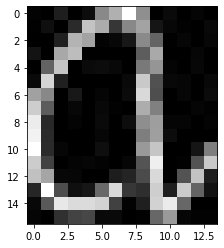

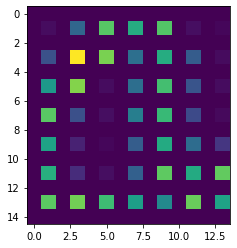

In [51]:
an_img = Image.open('/content/drive/My Drive/My Data/Do_An_Images/a/picture_2.jpg')
plt.imshow(an_img, cmap = 'gray')
#link_an_img = np.array(link_an_img)
im = Trim(an_img)
img,im = hog(im, pixels_per_cell=(2,2), cells_per_block=(2,2), visualize=True)
plt.figure()
plt.imshow(im)
print(im.size)
print(np.asarray(im).flatten().shape)

# Thực hiện

In [32]:
FJoin = os.path.join

In [33]:
def getLink(path):
    ans = []
    label = []
    index = 0
    list_folder = [FJoin(path, f) for f in sorted(os.listdir(path))]
    for f in list_folder:
        list_img = [FJoin(f, img_id) for img_id in sorted(os.listdir(f))]
        for img_link in list_img:
            ans.append(img_link)
            label.append(index)
        index += 1
    return ans, label

In [35]:
train_path = '/content/drive/MyDrive/My Data/Train'
vali_path = '/content/drive/MyDrive/My Data/Validation'
#test_path = '/content/drive/MyDrive/Dataset/TestingData'
link_train, label_train = getLink(train_path)
link_vali, label_vali = getLink(vali_path)
#link_test, label_test = getLink(test_path)
print(len(link_train))
print(len(link_vali))
#print(len(link_test))

20740
5229


In [54]:
print(link_train)
print(len(label_train))

['/content/drive/MyDrive/My Data/Train/a/picture_1.jpg', '/content/drive/MyDrive/My Data/Train/a/picture_10.jpg', '/content/drive/MyDrive/My Data/Train/a/picture_100.jpg', '/content/drive/MyDrive/My Data/Train/a/picture_103.jpg', '/content/drive/MyDrive/My Data/Train/a/picture_104.jpg', '/content/drive/MyDrive/My Data/Train/a/picture_105.jpg', '/content/drive/MyDrive/My Data/Train/a/picture_106.jpg', '/content/drive/MyDrive/My Data/Train/a/picture_107.jpg', '/content/drive/MyDrive/My Data/Train/a/picture_108.jpg', '/content/drive/MyDrive/My Data/Train/a/picture_109.jpg', '/content/drive/MyDrive/My Data/Train/a/picture_110.jpg', '/content/drive/MyDrive/My Data/Train/a/picture_111.jpg', '/content/drive/MyDrive/My Data/Train/a/picture_114.jpg', '/content/drive/MyDrive/My Data/Train/a/picture_115.jpg', '/content/drive/MyDrive/My Data/Train/a/picture_116.jpg', '/content/drive/MyDrive/My Data/Train/a/picture_117.jpg', '/content/drive/MyDrive/My Data/Train/a/picture_119.jpg', '/content/drive/

In [64]:
# Hàm trích xuất đặc trưng
def getFeature_Label(link, label):
    list_feature = []
    for img_link in link:
        img = Image.open(img_link).convert('LA')
        img = Trim(img)
        img = hog(img, pixels_per_cell=(2,2), cells_per_block=(2,2), visualize=False)
        list_feature.append(np.asarray(img).ravel())
        #print(np.asarray(img).ravel().shape)
    return np.array(list_feature), np.array(label)

#**Lấy feature các file train, validation, test và lưu vào file.csv**

In [65]:
X_train, Y_train = getFeature_Label(link_train, label_train)

In [72]:
len(X_train[0])

1512

In [70]:
pd.DataFrame(X_train).to_csv('/content/drive/MyDrive/My Data/Save_Data/X_train_HOG.csv', header= None, index=None)
pd.DataFrame(Y_train).to_csv('/content/drive/MyDrive/My Data/Save_Data/Y_train_HOG.csv', header= None, index=None)

In [73]:
X_val, Y_val = getFeature_Label(link_vali, label_vali)

In [75]:
print(X_val[0])

[0.00883103 0.         0.         ... 0.         0.         0.        ]


In [76]:
pd.DataFrame(X_val).to_csv('/content/drive/MyDrive/My Data/Save_Data/X_val_HOG.csv', header= None, index=None)
pd.DataFrame(Y_val).to_csv('/content/drive/MyDrive/My Data/Save_Data/Y_val_HOG.csv', header= None, index=None)